In [1]:
%matplotlib inline

In [2]:
from matplotlib.animation import FuncAnimation

In [3]:
from qutip import *
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.constants import *

In [4]:
font = {'size'   : 15}

matplotlib.rc('font', **font)

In [5]:
omega_q = 2*pi * 1
delta_omega_q = 0.0005*omega_q

In [6]:
H = delta_omega_q/2*sigmaz()

In [7]:
gamma_rel = 0.0
gamma_deph = 0.0
A = 1

In [8]:
pi_half_1 = 10
pi_int = 60
pi_half_2 = 110

In [9]:
T = np.linspace(0, 120, 5000)
Y = 0.5 * (np.sign(T - pi_half_1+0.25/A) + 1)*np.cos(0*T)*0.5 * (np.sign(pi_half_1+0.25/A-T) + 1) +\
0.5 * (np.sign(T - pi_int+0.5/A) + 1)*np.cos(0*T)*0.5 * (np.sign(pi_int+0.5/A - T) + 1)\
+ 0.5 * (np.sign(T - pi_half_2+0.25/A)+1)*np.cos(0*T)*0.5 * (np.sign(pi_half_2+0.25/A-T)+1)

(-5.0, 120.0)

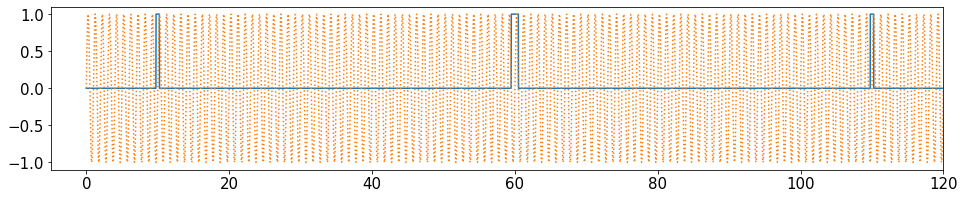

In [10]:
plt.plot(T, Y)
plt.plot(T, np.sin(omega_q*T), ":")
plt.gcf().set_size_inches(16, 3)
plt.xlim(-5, 120)

In [11]:
opts = Options(max_step=0.1)

In [12]:
Ts = np.linspace(0, 120, 5000)
result = mesolve([H,[A/2*pi*sigmay(), '0.5 * (np.sign(t - %f + %f/A) + 1)*np.cos(omega*t)* 0.5 * (np.sign(%f+%f/A-t) + 1)+\
    0.5 * (np.sign(t - %f + %f/A)+1)*np.cos(omega*t)*0.5 * (np.sign(%f + %f/A-t)+1)'\
                      %(pi_half_1, 0.25, pi_half_1, 0.25, pi_half_2, 0.25, pi_half_2, 0.25)],
                  [A/2*pi*sigmax(), 
                      '0.5 * (np.sign(t - %f + %f/A) + 1)*np.cos(omega*t)*0.5 * (np.sign(%f+%f/A - t) + 1)'\
         %(pi_int, 0.5, pi_int, 0.5)]], 
                 (basis(2,1)), Ts, [np.sqrt(gamma_deph)*sigmaz(), np.sqrt(gamma_rel)*sigmam()],
                 [sigmax(), sigmay(), sigmaz()], args = {"omega":0, "A":A}, options=opts)
expects = np.array(result.expect)


(-1.0, 1.0)

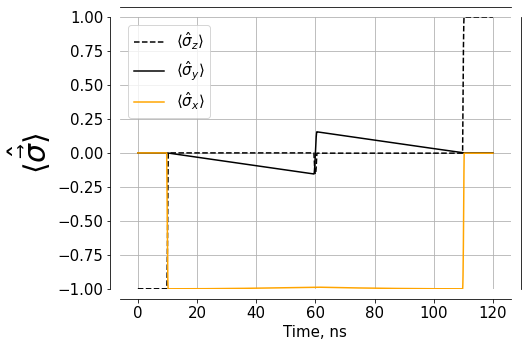

In [13]:
plt.plot(Ts,expects[2], "--", color="black", label = "$\\langle \hat \\sigma_z\\rangle$")
plt.plot(Ts,expects[1], "black", label = "$\\langle \hat\\sigma_y\\rangle$")
plt.plot(Ts,expects[0], "orange", label = "$\\langle\hat\\sigma_x\\rangle$")

# plt.plot(Ts, np.sin(Ts)**2)
dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))

plt.gcf().set_size_inches(7,5)
plt.grid()
plt.xlabel("Time, ns")
plt.ylabel(r"$\langle\hat\vec\sigma\rangle$", fontsize=30)
plt.legend(loc=2)
plt.ylim(-1,1)

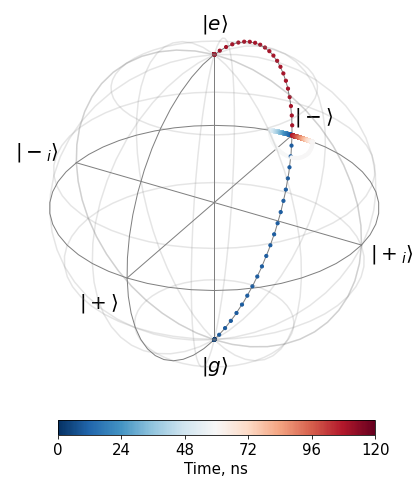

In [14]:
expects = np.array(result.expect)
nrm=matplotlib.colors.Normalize(0,Ts[-1])
colors=cm.RdBu_r(nrm(Ts))

fig = plt.figure(figsize=(7,7))
axes = fig.add_axes([0.1, 0.2, 0.8, 0.8], projection="3d")
sph = Bloch(fig=fig, axes=axes)
sph.sphere_alpha = 0
sph.zlabel = [r'$\left|e\rightangle\right.$', r"$\left|g\rightangle\right.$"]
sph.xlpos = [1.3, -1.3]
sph.xlabel = [r'$\left.|+\right\rangle$', r"$\left.|-\right\rangle$"]
sph.ylpos = [1.2, -1.3]
sph.ylabel = [r'$\left.|+_i\right\rangle$', r"$\left.|-_i\right\rangle$"]
sph.xlpos = [1.3, -1.3]
sph.point_size=[40]
#axes.view_init(elev=10)

sph.point_color = list(colors)
sph.point_marker=['.']
sph.add_points(expects[:, :], meth='m')
sph.render(fig, axes)
m = cm.ScalarMappable(cmap=cm.RdBu_r, norm=nrm)
m.set_array(Ts)
m.set_clim(0, Ts[-1])
position=fig.add_axes([0.2,0.15,0.63,0.03])
cb = fig.colorbar(m, orientation='horizontal', cax=position)
cb.set_label("Time, ns")
cb.set_ticks(np.linspace(0,round(Ts[-1]),6))

In [15]:
expects[:,:]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.32726994e-03, -2.32726453e-03, -2.32725912e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.15507577e-05, -7.17262647e-05, -7.19017712e-05],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         9.99996982e-01,  9.99996982e-01,  9.99996982e-01]])

## Animation

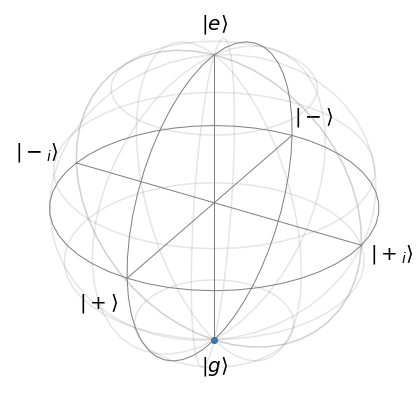

In [16]:
#plt.rcParams['animation.ffmpeg_path'] = "C:\FFmpeg\bin\ffmpeg.exe" 
expects = np.array(result.expect)
nrm=matplotlib.colors.Normalize(0,Ts[-1])
colors=cm.copper(nrm(Ts))

fig = plt.figure(figsize=(7,7))
axes = fig.add_axes([0.1, 0.2, 0.8, 0.8], projection="3d")

m = cm.ScalarMappable(cmap=cm.copper, norm=nrm)
m.set_array(Ts)
m.set_clim(0, Ts[-1])


sph = Bloch(fig, axes)
sph.sphere_alpha = 0
sph.zlabel = [r'$\left|e\rightangle\right.$', r"$\left|g\rightangle\right.$"]
sph.xlpos = [1.3, -1.3]
sph.xlabel = [r'$\left.|+\right\rangle$', r"$\left.|-\right\rangle$"]
sph.ylpos = [1.2, -1.3]
sph.ylabel = [r'$\left.|+_i\right\rangle$', r"$\left.|-_i\right\rangle$"]
sph.xlpos = [1.3, -1.3]
sph.point_size=[40]

sph.make_sphere()

line = axes.plot(expects[0, 0:1], expects[1, 0:1], expects[2, 0:1],'o')[0]

def animate(i):
    line.set_data(expects[1, 0:i], -expects[0, 0:i])
    line.set_3d_properties(expects[2, 0:i])
    sph.add_points(expects[:, 0 : i], meth='m')
    sph.render(fig, axes)
    
anim = FuncAnimation(fig, animate, frames = range(0, expects.shape[1], 10), interval = 10, blit= False, repeat = False)
#anim.save ('qubit_dynamic.gif', writer = 'imagemagick')

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1., -1., -1., -1.]])

In [18]:
line.get_color()

'#1f77b4'

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)


# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,


xdata, ydata = [], []


# функция анимации
def animate(i):
    t = 0.1 * i

    # x, y данные на графике
    x = t * np.sin(t)
    y = t * np.cos(t)

    # добавление новых точек в список точек осей x, y
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,


# Заголовок анимации
plt.title('Создаем спираль в matplotlib')
# Скрываем лишние данные
plt.axis('off')

# Вызов анимации.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

# Сохраняем анимацию как gif файл
anim.save('coil.gif', writer='imagemagick')
